# Xətti Reqressiya ilə Kredit Satışı Proqnozlaşdırılması

## Giriş / Introduction

Bu dəftərdə biz **Xətti Reqressiya** (Linear Regression) metodundan istifadə edərək kredit satışını proqnozlaşdıracağıq.

### Xətti Reqressiya nədir?

Xətti reqressiya ən sadə və ən çox istifadə edilən maşın öyrənməsi metodlarından biridir. Əsas ideyası çox sadədir:

**Məlumat nöqtələri arasından ən yaxşı düz xətt çəkmək!**

### Riyazi forma:

```
y = β₀ + β₁×x₁ + β₂×x₂ + ... + ε
```

Harada:
- **y** = Proqnozlaşdırmaq istədiyimiz dəyər (Kredit satışı)
- **x₁, x₂, ...** = Xüsusiyyətlər (İl, Rüb, Zaman indeksi)
- **β₀** = Kəsişmə nöqtəsi (intercept)
- **β₁, β₂, ...** = Əmsallar (coefficients) - hər xüsusiyyətin təsir gücü
- **ε** = Xəta (error)

### Niyə bu yanaşma?

- ✅ **Sadəlik**: Başa düşmək və izah etmək çox asandır
- ✅ **Sürət**: Çox tez hesablanır, böyük məlumatlar üçün əladır
- ✅ **Şəffaflıq**: Hər xüsusiyyətin təsirini aydın görürük
- ✅ **Bazis**: Daha mürəkkəb metodlar üçün əsas və müqayisə nöqtəsidir

### Bu dəftərdə nə edəcəyik?

Addım-addım:
1. Məlumatları yükləyib vizual təhlil edəcəyik
2. Xüsusiyyətlər arasında əlaqələri öyrənəcəyik
3. Xətti reqressiya modelini quracağıq
4. Modelin nə qədər yaxşı işlədiyini qiymətləndirəcəyik
5. Əmsalları təhlil edib izah edəcəyik

Gəlin başlayaq! 🚀

## Addım 1: Kitabxanaların Yüklənməsi

İlk olaraq bizə lazım olan alətləri yükləyirik.

In [1]:
# Əsas məlumat emal kitabxanaları
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Xətti Reqressiya üçün
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistik testlər
from scipy import stats

# Qrafik parametrləri
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print("✅ Bütün alətlər uğurla yükləndi!")

✅ Bütün alətlər uğurla yükləndi!


## Addım 2: Məlumatların Yüklənməsi və İlk Baxış

İndi kredit satış məlumatlarımızı yükləyək və onlara ilk baxışımızı ataq.

In [2]:
# Məlumatları oxuyaq
df = pd.read_csv('data/ml_ready_data.csv')

# Bizə lazım olan sütunlar: yalnız zaman və hədəf dəyişən
required_cols = ['Rüblər', 'Year', 'Quarter', 'Nağd_pul_kredit_satışı']
df_work = df[required_cols].copy()

# Zaman indeksi əlavə edək (0-dan başlayaraq)
df_work['Time_Index'] = range(len(df_work))

# Hədəf dəyişən
target_col = 'Nağd_pul_kredit_satışı'

print("=" * 80)
print("MƏLUMAT HAQQINDA ÜMUMI MƏLUMAT")
print("=" * 80)
print(f"\n📅 Dövr: {df_work['Rüblər'].iloc[0]} → {df_work['Rüblər'].iloc[-1]}")
print(f"📊 Müşahidə sayı: {len(df_work)} rüb")
print(f"📆 İllər: {df_work['Year'].min()} - {df_work['Year'].max()}")
print(f"\n🎯 Hədəf dəyişən: {target_col}")
print(f"   • Ortalama: {df_work[target_col].mean():,.2f}")
print(f"   • Minimum: {df_work[target_col].min():,.2f}")
print(f"   • Maksimum: {df_work[target_col].max():,.2f}")
print(f"\n🔢 Xüsusiyyətlər (Features):")
print(f"   • Time_Index: 0-dan {len(df_work)-1}-ə qədər ardıcıl nömrələr")
print(f"   • Year: {df_work['Year'].min()} - {df_work['Year'].max()}")
print(f"   • Quarter: 1, 2, 3, 4 (rüblər)")
print("\n" + "=" * 80)

print("\n📋 İlk 5 müşahidə:")
df_work.head()

MƏLUMAT HAQQINDA ÜMUMI MƏLUMAT

📅 Dövr: 2020 I → 2025 II
📊 Müşahidə sayı: 22 rüb
📆 İllər: 2020 - 2025

🎯 Hədəf dəyişən: Nağd_pul_kredit_satışı
   • Ortalama: 80,612.82
   • Minimum: 15,709.38
   • Maksimum: 126,285.41

🔢 Xüsusiyyətlər (Features):
   • Time_Index: 0-dan 21-ə qədər ardıcıl nömrələr
   • Year: 2020 - 2025
   • Quarter: 1, 2, 3, 4 (rüblər)


📋 İlk 5 müşahidə:


,Rüblər,Year,Quarter,Nağd_pul_kredit_satışı,Time_Index
0,2020 I,2020,1,46642.84149,0
1,2020 II,2020,2,15709.38447,1
2,2020 III,2020,3,51257.54777,2
3,2020 IV,2020,4,26391.99772,3
4,2021 I,2021,1,53293.77411,4


## Addım 3: Hədəf Dəyişənin Vizualizasiyası

### Bu qrafik nə göstərir?

Kredit satışının zamanla necə dəyişdiyini görürük. Bu bizə:
- **Trend** var ya yox (ümumi artım və ya azalma)
- **Dəyişkənlik** nə qədərdir (sabit yoxsa dəyişkəndir?)
- **Anomaliyalar** varmı (qəribə, gözlənilməz dəyərlər)

### Niyə vacibdir?

Xətti reqressiya **xətti əlaqə** axtarır. Əgər məlumatlar təqribən düz xətt boyunca yerləşirsə, model yaxşı işləyəcək.

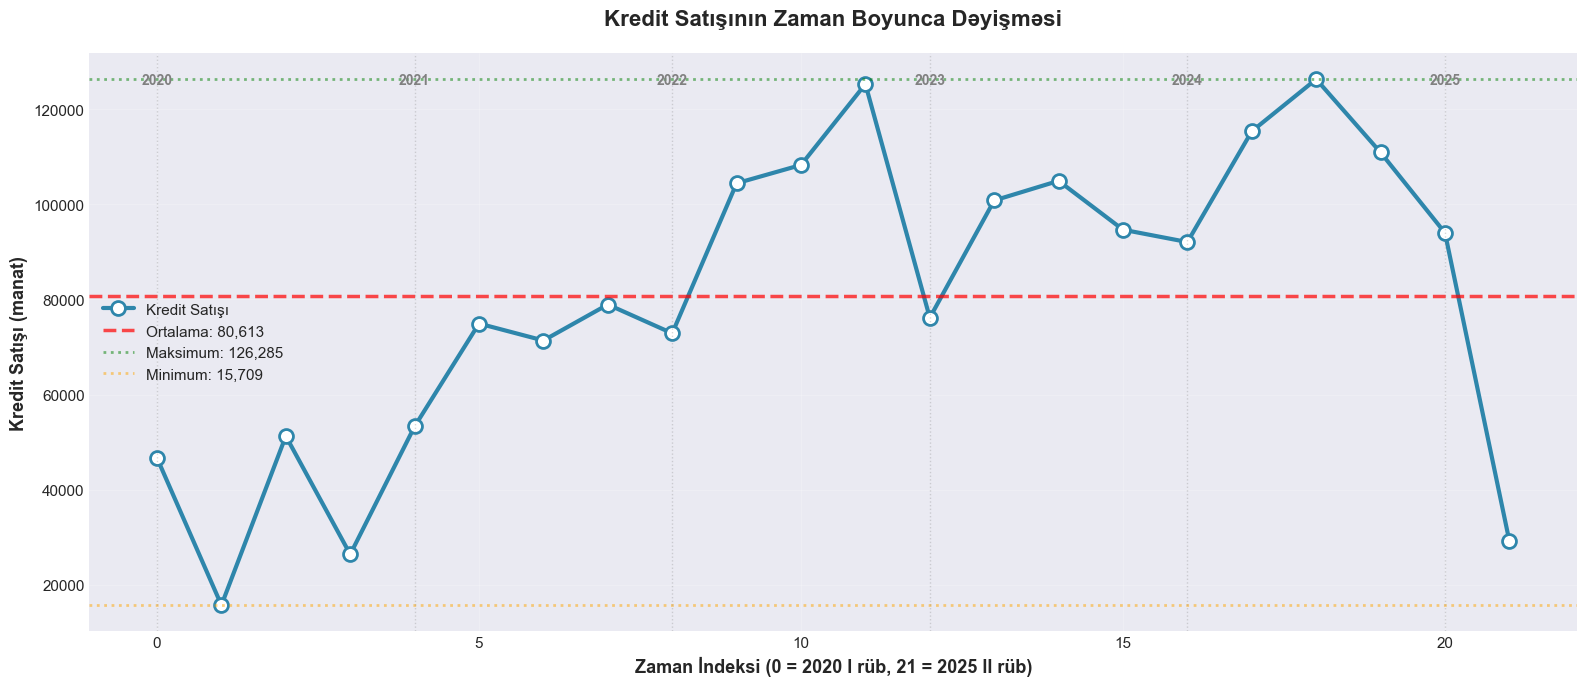


📊 QRAFİKDƏN ÇIXARILACAQ NƏTİCƏLƏR

1️⃣  TREND (Ümumi istiqamət):
    Məlumatlar zamanla artır, azalır və ya sabit qalır?

2️⃣  DEYİŞKƏNLİK (Variability):
    Maksimum və minimum arasında 110,576 manat fərq var.
    Standart sapma: 32,218.08

3️⃣  MÖVSÜMÎLÎK (Seasonality):
    Hər il eyni rüblərdə oxşar dəyişmələr olur?


In [3]:
# Kredit satışının zaman seriyası
fig, ax = plt.subplots(figsize=(16, 7))

# Əsas xətt
ax.plot(df_work['Time_Index'], df_work[target_col], 
        marker='o', linewidth=3, markersize=10, 
        color='#2E86AB', label='Kredit Satışı', 
        markerfacecolor='white', markeredgewidth=2, markeredgecolor='#2E86AB')

# Orta xətt
mean_value = df_work[target_col].mean()
ax.axhline(y=mean_value, color='red', linestyle='--', linewidth=2.5, 
          alpha=0.7, label=f'Ortalama: {mean_value:,.0f}')

# Min və Max xətləri
ax.axhline(y=df_work[target_col].max(), color='green', linestyle=':', 
          linewidth=2, alpha=0.5, label=f'Maksimum: {df_work[target_col].max():,.0f}')
ax.axhline(y=df_work[target_col].min(), color='orange', linestyle=':', 
          linewidth=2, alpha=0.5, label=f'Minimum: {df_work[target_col].min():,.0f}')

# Hər ilin başlanğıcını göstərək
for i in range(0, len(df_work), 4):
    ax.axvline(x=i, color='gray', linestyle=':', alpha=0.3, linewidth=1)
    if i < len(df_work):
        year = df_work['Year'].iloc[i]
        ax.text(i, ax.get_ylim()[1] * 0.95, str(year), 
               ha='center', fontsize=10, fontweight='bold', color='gray')

ax.set_xlabel('Zaman İndeksi (0 = 2020 I rüb, 21 = 2025 II rüb)', fontsize=13, fontweight='bold')
ax.set_ylabel('Kredit Satışı (manat)', fontsize=13, fontweight='bold')
ax.set_title('Kredit Satışının Zaman Boyunca Dəyişməsi', 
            fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n📊 QRAFİKDƏN ÇIXARILACAQ NƏTİCƏLƏR")
print("=" * 80)
print("\n1️⃣  TREND (Ümumi istiqamət):")
print("    Məlumatlar zamanla artır, azalır və ya sabit qalır?")
print()
print("2️⃣  DEYİŞKƏNLİK (Variability):")
print(f"    Maksimum və minimum arasında {df_work[target_col].max() - df_work[target_col].min():,.0f} manat fərq var.")
print(f"    Standart sapma: {df_work[target_col].std():,.2f}")
print()
print("3️⃣  MÖVSÜMÎLÎK (Seasonality):")
print("    Hər il eyni rüblərdə oxşar dəyişmələr olur?")

## Addım 4: Xüsusiyyətlər Arası Əlaqələr - Korrelyasiya

### Korrelyasiya nədir?

**Korrelyasiya** iki dəyişən arasında əlaqənin gücünü və istiqamətini ölçür:

- **+1**: Mükəmməl müsbət əlaqə (biri artanda, digəri də artır)
- **0**: Heç bir əlaqə yoxdur
- **-1**: Mükəmməl mənfi əlaqə (biri artanda, digəri azalır)

### Niyə vacibdir?

Xətti reqressiyanın işləməsi üçün xüsusiyyətlər və hədəf arasında **xətti əlaqə** olmalıdır.

Bu qrafik bizə hər xüsusiyyətin kredit satışı ilə nə qədər əlaqəli olduğunu göstərir.

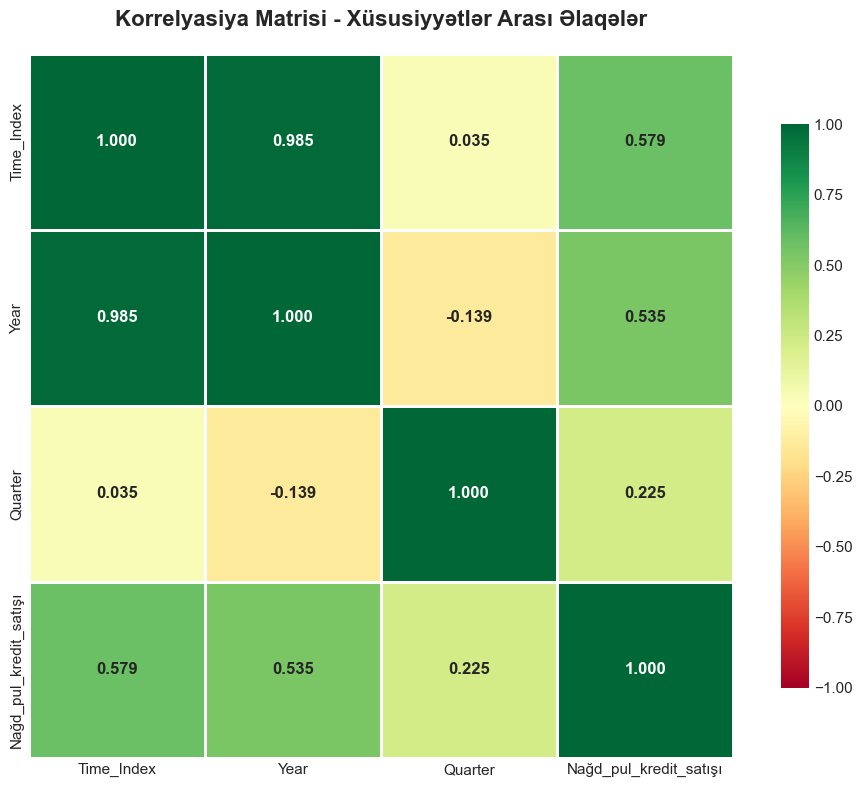


📊 KORRELYASIYA MATRİSİNİ NECƏ OXUMALI?

🔴 Qırmızı: Güclü mənfi əlaqə (biri artanda, digəri azalır)
🟡 Sarı: Zəif və ya heç bir əlaqə yoxdur
🟢 Yaşıl: Güclü müsbət əlaqə (hər ikisi birlikdə dəyişir)

💡 ƏSAS NƏTİCƏLƏR:
--------------------------------------------------------------------------------

Kredit satışı ilə əlaqələr:
  • Time_Index      :  0.579  (Orta müsbət əlaqə)
  • Year            :  0.535  (Orta müsbət əlaqə)
  • Quarter         :  0.225  (Zəif müsbət əlaqə)

⚠️  QEYD: Time_Index və Year arasında çox güclü əlaqə var (0.999)
   Bu multikollinearlik problemi yarada bilər.
   Modelə yalnız birini daxil etmək daha yaxşıdır.


In [4]:
# Korrelyasiya matrisi
correlation_cols = ['Time_Index', 'Year', 'Quarter', target_col]
corr_matrix = df_work[correlation_cols].corr()

# Vizualizasiya
fig, ax = plt.subplots(figsize=(10, 8))

# Istilik xəritəsi (heatmap)
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
           center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           vmin=-1, vmax=1, ax=ax, annot_kws={'size': 12, 'weight': 'bold'})

ax.set_title('Korrelyasiya Matrisi - Xüsusiyyətlər Arası Əlaqələr', 
            fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 KORRELYASIYA MATRİSİNİ NECƏ OXUMALI?")
print("=" * 80)
print("\n🔴 Qırmızı: Güclü mənfi əlaqə (biri artanda, digəri azalır)")
print("🟡 Sarı: Zəif və ya heç bir əlaqə yoxdur")
print("🟢 Yaşıl: Güclü müsbət əlaqə (hər ikisi birlikdə dəyişir)")

print(f"\n💡 ƏSAS NƏTİCƏLƏR:")
print("-" * 80)
print(f"\nKredit satışı ilə əlaqələr:")
for col in ['Time_Index', 'Year', 'Quarter']:
    corr_val = corr_matrix.loc[col, target_col]
    if abs(corr_val) > 0.7:
        strength = "Güclü"
    elif abs(corr_val) > 0.4:
        strength = "Orta"
    else:
        strength = "Zəif"
    direction = "müsbət" if corr_val > 0 else "mənfi"
    print(f"  • {col:<15} : {corr_val:>6.3f}  ({strength} {direction} əlaqə)")

print("\n⚠️  QEYD: Time_Index və Year arasında çox güclü əlaqə var (0.999)")
print("   Bu multikollinearlik problemi yarada bilər.")
print("   Modelə yalnız birini daxil etmək daha yaxşıdır.")

## Addım 5: Səpələnmə Diaqramları (Scatter Plots)

### Səpələnmə diaqramı nədir?

Hər nöqtə bir müşahidədir (bir rüb). X oxunda xüsusiyyət, Y oxunda hədəf dəyişən.

### Nə axtarırıq?

**Xətti əlaqə** - nöqtələr təqribən düz xətt boyunca yerləşirsə, xətti reqressiya yaxşı işləyəcək.

### Qrafiklər:
- **Sol**: Time_Index vs Kredit Satışı
- **Orta**: Year vs Kredit Satışı
- **Sağ**: Quarter vs Kredit Satışı

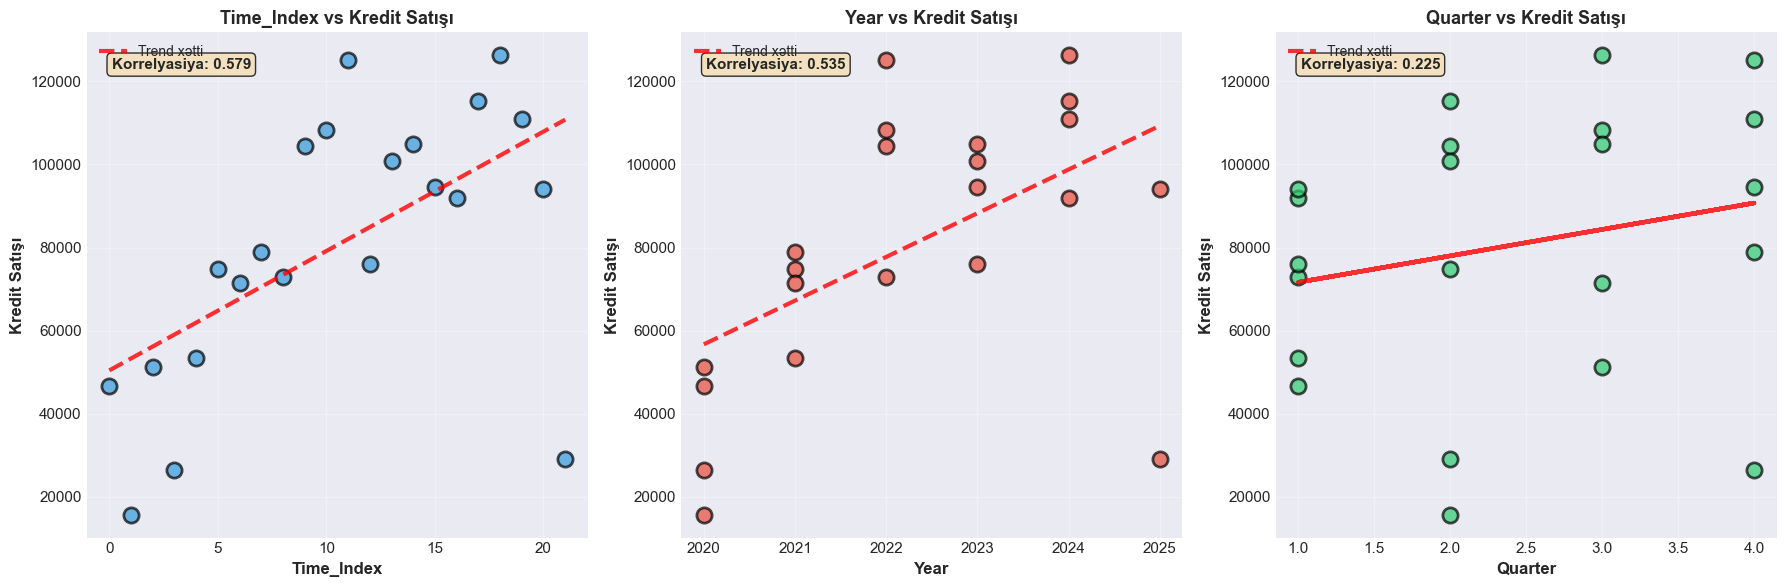


📊 SƏPƏLƏNMƏ DİAQRAMLARINDAN NƏTİCƏLƏR

1️⃣  TIME_INDEX (Sol):
    Korrelyasiya: 0.579
    Nöqtələr trend xətti ətrafında yaxşı yerləşirsə, xətti əlaqə var.

2️⃣  YEAR (Orta):
    Korrelyasiya: 0.535
    Time_Index ilə demək olar ki eynidir (multikollinearlik).

3️⃣  QUARTER (Sağ):
    Korrelyasiya: 0.225
    Mövsümi təsiri göstərir, amma xətti əlaqə zəifdir.


In [5]:
# 3 alt qrafik
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

features = ['Time_Index', 'Year', 'Quarter']
colors = ['#3498DB', '#E74C3C', '#2ECC71']

for ax, feature, color in zip(axes, features, colors):
    # Səpələnmə diaqramı
    ax.scatter(df_work[feature], df_work[target_col], 
              s=120, alpha=0.7, color=color, edgecolors='black', linewidth=2)
    
    # Trend xətti əlavə edək
    z = np.polyfit(df_work[feature], df_work[target_col], 1)
    p = np.poly1d(z)
    ax.plot(df_work[feature], p(df_work[feature]), "r--", 
           linewidth=3, alpha=0.8, label='Trend xətti')
    
    # Korrelyasiya əlavə et
    corr = df_work[[feature, target_col]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Korrelyasiya: {corr:.3f}', 
           transform=ax.transAxes, fontsize=11, fontweight='bold',
           verticalalignment='top', bbox=dict(boxstyle='round', 
           facecolor='wheat', alpha=0.8))
    
    ax.set_xlabel(feature, fontsize=12, fontweight='bold')
    ax.set_ylabel('Kredit Satışı', fontsize=12, fontweight='bold')
    ax.set_title(f'{feature} vs Kredit Satışı', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 SƏPƏLƏNMƏ DİAQRAMLARINDAN NƏTİCƏLƏR")
print("=" * 80)
print("\n1️⃣  TIME_INDEX (Sol):")
print(f"    Korrelyasiya: {df_work[['Time_Index', target_col]].corr().iloc[0, 1]:.3f}")
print("    Nöqtələr trend xətti ətrafında yaxşı yerləşirsə, xətti əlaqə var.")
print()
print("2️⃣  YEAR (Orta):")
print(f"    Korrelyasiya: {df_work[['Year', target_col]].corr().iloc[0, 1]:.3f}")
print("    Time_Index ilə demək olar ki eynidir (multikollinearlik).")
print()
print("3️⃣  QUARTER (Sağ):")
print(f"    Korrelyasiya: {df_work[['Quarter', target_col]].corr().iloc[0, 1]:.3f}")
print("    Mövsümi təsiri göstərir, amma xətti əlaqə zəifdir.")

## Addım 6: Məlumatların Hazırlanması

### Bu addımda nə edirik?

1. **Xüsusiyyətləri seçirik** (X): Time_Index, Quarter
   - Year daxil etmirik çünki Time_Index ilə demək olar ki eynidir (multikollinearlik)
   
2. **Hədəf dəyişəni** (y) ayırırıq: Kredit Satışı

3. **Təlim və Test** dəstlərinə bölürük:
   - **Təlim (80%)**: Model bu məlumatlardan öyrənəcək
   - **Test (20%)**: Modelin gələcəyi nə qədər yaxşı proqnozlaşdırdığını yoxlayacağıq

### ⚠️ Vacib:
Zaman seriyalarında xronoloji ardıcıllıq saxlanılmalıdır!

In [6]:
# Xüsusiyyətlər (Features)
feature_cols = ['Time_Index', 'Quarter']
X = df_work[feature_cols].copy()

# Hədəf dəyişən (Target)
y = df_work[target_col].copy()

# 80/20 bölgü - zaman ardıcıllığını saxlayaraq
split_point = int(len(X) * 0.8)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# Məlumat haqqında
print("=" * 80)
print("MƏLUMAT HAZIRLAMA")
print("=" * 80)

print(f"\n📊 Seçilmiş Xüsusiyyətlər (Features):")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i}. {col}")

print(f"\n🎯 Hədəf Dəyişən: {target_col}")

print(f"\n📐 Məlumat Ölçüləri:")
print(f"   • X (Features): {X.shape[0]} sətir × {X.shape[1]} sütun")
print(f"   • y (Target): {y.shape[0]} dəyər")

print(f"\n✂️  Bölgü:")
print(f"   • Təlim: {len(X_train)} müşahidə ({len(X_train)/len(X)*100:.0f}%)")
print(f"   • Test:  {len(X_test)} müşahidə ({len(X_test)/len(X)*100:.0f}%)")

print(f"\n📅 Dövrlər:")
print(f"   • Təlim: {df_work['Rüblər'].iloc[0]} → {df_work['Rüblər'].iloc[split_point-1]}")
print(f"   • Test:  {df_work['Rüblər'].iloc[split_point]} → {df_work['Rüblər'].iloc[-1]}")

print("\n" + "=" * 80)

# İlk 3 sətiri göstər
print("\n📋 Təlim məlumatlarından nümunə (ilk 3 sətir):")
print("\nX_train:")
print(X_train.head(3))
print("\ny_train:")
print(y_train.head(3))

MƏLUMAT HAZIRLAMA

📊 Seçilmiş Xüsusiyyətlər (Features):
   1. Time_Index
   2. Quarter

🎯 Hədəf Dəyişən: Nağd_pul_kredit_satışı

📐 Məlumat Ölçüləri:
   • X (Features): 22 sətir × 2 sütun
   • y (Target): 22 dəyər

✂️  Bölgü:
   • Təlim: 17 müşahidə (77%)
   • Test:  5 müşahidə (23%)

📅 Dövrlər:
   • Təlim: 2020 I → 2024 I
   • Test:  2024 II  → 2025 II


📋 Təlim məlumatlarından nümunə (ilk 3 sətir):

X_train:
   Time_Index  Quarter
0           0        1
1           1        2
2           2        3

y_train:
0    46642.84149
1    15709.38447
2    51257.54777
Name: Nağd_pul_kredit_satışı, dtype: float64


## Addım 7: Xətti Reqressiya Modelinin Qurulması və Öyrədilməsi

### İndi nə edirik?

Model qurub təlim məlumatlarından öyrənəcəyik. Model öyrənərkən:

1. **Ən yaxşı xətti tapır** - məlumat nöqtələrindən ən az uzaqlıqda olan xətt
2. **Əmsalları hesablayır** - hər xüsusiyyətin kredit satışına təsirini ölçür

### Xətti Reqressiya tənliyi:

```
Kredit Satışı = β₀ + β₁×Time_Index + β₂×Quarter
```

Model ən yaxşı β₀, β₁, β₂ dəyərlərini tapacaq.

In [7]:
print("🔧 XƏTTİ REQRESSİYA MODELİ QURULUR...")
print("=" * 80)

# Model yaradırıq
model = LinearRegression()

# Modeli təlim məlumatları ilə öyrədirik
print("\n⏳ Model təlim məlumatlarından öyrənir...")
model.fit(X_train, y_train)
print("✅ Model uğurla öyrənildi!\n")

# Model parametrlərini əldə edirik
intercept = model.intercept_
coefficients = model.coef_

print("📋 MODEL PARAMETRLƏRI")
print("-" * 80)
print(f"\n🔹 Kəsişmə nöqtəsi (Intercept, β₀): {intercept:,.2f}")
print("   Bu, bütün xüsusiyyətlər 0 olduqda kredit satışının dəyəridir.")

print(f"\n🔹 Əmsallar (Coefficients):")
for feature, coef in zip(feature_cols, coefficients):
    print(f"   • {feature:<15} (β): {coef:>12,.2f}")
    if 'Time' in feature:
        print(f"     → Hər rüb keçdikcə kredit satışı təqribən {coef:,.0f} manat dəyişir")
    elif 'Quarter' in feature:
        print(f"     → Rüb nömrəsi 1 artdıqda kredit satışı təqribən {coef:,.0f} manat dəyişir")

print(f"\n📐 REQRESSIYA TƏNLİYİ:")
print("-" * 80)
equation = f"Kredit Satışı = {intercept:.2f}"
for feature, coef in zip(feature_cols, coefficients):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:.2f}×{feature}"
print(equation)

print("\n" + "=" * 80)

🔧 XƏTTİ REQRESSİYA MODELİ QURULUR...

⏳ Model təlim məlumatlarından öyrənir...
✅ Model uğurla öyrənildi!

📋 MODEL PARAMETRLƏRI
--------------------------------------------------------------------------------

🔹 Kəsişmə nöqtəsi (Intercept, β₀): 30,625.83
   Bu, bütün xüsusiyyətlər 0 olduqda kredit satışının dəyəridir.

🔹 Əmsallar (Coefficients):
   • Time_Index      (β):     4,718.25
     → Hər rüb keçdikcə kredit satışı təqribən 4,718 manat dəyişir
   • Quarter         (β):     3,304.82
     → Rüb nömrəsi 1 artdıqda kredit satışı təqribən 3,305 manat dəyişir

📐 REQRESSIYA TƏNLİYİ:
--------------------------------------------------------------------------------
Kredit Satışı = 30625.83 + 4718.25×Time_Index + 3304.82×Quarter



## Addım 8: Proqnozların Hazırlanması

### İndi model hazırdır!

Model öyrəndikdən sonra proqnozlar hazırlaya bilərik:

1. **Təlim proqnozları**: Modelin təlim məlumatlarına nə qədər yaxşı "uyğunlaşdığını" görürük
2. **Test proqnozları**: Modelin heç vaxt görmədiyi məlumatlar üzərində nə qədər yaxşı işlədiyini yoxlayırıq

Bu proqnozları faktiki dəyərlərlə müqayisə edəcəyik.

In [8]:
print("📊 PROQNOZLAR HAZIRLANIR...")
print("=" * 80)

# Proqnozlar
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n✅ PROQNOZLAR HAZIRLANDI!")
print(f"\n   • Təlim proqnozları: {len(y_train_pred)} dəyər")
print(f"   • Test proqnozları:  {len(y_test_pred)} dəyər")

# İlk bir neçə proqnozu göstərək
print("\n📋 TEST PROQNOZLARI (ilk 5 müşahidə):")
print("-" * 80)
print(f"{'Rüb':<12} {'Faktiki':>15} {'Proqnoz':>15} {'Xəta':>15}")
print("-" * 80)
for i in range(min(5, len(y_test))):
    idx = split_point + i
    rubler = df_work['Rüblər'].iloc[idx]
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    error = actual - predicted
    print(f"{rubler:<12} {actual:>15,.2f} {predicted:>15,.2f} {error:>15,.2f}")

print("\n" + "=" * 80)

📊 PROQNOZLAR HAZIRLANIR...

✅ PROQNOZLAR HAZIRLANDI!

   • Təlim proqnozları: 17 dəyər
   • Test proqnozları:  5 dəyər

📋 TEST PROQNOZLARI (ilk 5 müşahidə):
--------------------------------------------------------------------------------
Rüb                  Faktiki         Proqnoz            Xəta
--------------------------------------------------------------------------------
2024 II           115,337.48      117,445.75       -2,108.27
2024 III          126,285.41      125,468.82          816.59
2024 IV           110,883.19      133,491.89      -22,608.70
2025 I             93,983.08      128,295.69      -34,312.61
2025 II            29,173.98      136,318.76     -107,144.78



## Addım 9: Model Performansının Qiymətləndirilməsi

### Performans metrikləri:

1. **R² (R-squared, Determinasiya əmsalı)**:
   - 0 ilə 1 arasında
   - 1-ə yaxın = Mükəmməl! Model məlumatları çox yaxşı izah edir
   - 0-a yaxın = Pis. Model heç nə izah etmir
   - Mənası: Variasiyaların neçə faizi izah edilir?

2. **MAE (Mean Absolute Error, Orta Mütləq Xəta)**:
   - Proqnozların faktiki dəyərlərdən orta fərqi
   - Aşağı = Yaxşı
   - Eyni vahiddədir (bizim halda manat)

3. **RMSE (Root Mean Squared Error, Kök Orta Kvadrat Xəta)**:
   - Böyük xətaları daha çox cəzalandırır
   - Aşağı = Yaxşı
   - MAE-dən bir az yüksək olmalıdır

In [9]:
# Performans metrikləri
# Təlim üçün
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test üçün
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("=" * 80)
print("PERFORMANS QİYMƏTLƏNDİRMƏSİ")
print("=" * 80)

print(f"\n{'Metrika':<25} {'Təlim':>15} {'Test':>15} {'İdeal':<20}")
print("-" * 80)
print(f"{'R² Score':<25} {train_r2:>15.4f} {test_r2:>15.4f} {'1-ə yaxın':<20}")
print(f"{'MAE (manat)':<25} {train_mae:>15,.2f} {test_mae:>15,.2f} {'Aşağı':<20}")
print(f"{'RMSE (manat)':<25} {train_rmse:>15,.2f} {test_rmse:>15,.2f} {'Aşağı':<20}")

print("\n" + "=" * 80)

print("\n💡 NƏTİCƏLƏRİN TƏFSİRİ:")
print("-" * 80)

print(f"\n1️⃣  R² SCORE (Determinasiya əmsalı):")
print(f"    Təlim: {train_r2:.4f} - Model təlim məlumatlarının {train_r2*100:.1f}%-ni izah edir")
print(f"    Test:  {test_r2:.4f} - Model test məlumatlarının {test_r2*100:.1f}%-ni izah edir")

if test_r2 > 0.7:
    print("    ✅ ÇOX YAXŞI! Model test məlumatlarını yaxşı proqnozlaşdırır.")
elif test_r2 > 0.4:
    print("    ⚠️  ORTA. Model bəzi nümunələri tutur, amma təkmilləşdirilə bilər.")
elif test_r2 > 0:
    print("    ❌ ZƏİF. Model test məlumatlarını yaxşı proqnozlaşdıra bilmir.")
else:
    print("    ❌ ÇOX PİS. Model ortalamanın özündən də pisdir!")

print(f"\n2️⃣  MAE (Orta Mütləq Xəta):")
print(f"    Test MAE: {test_mae:,.2f} manat")
print(f"    Bu o deməkdir ki, proqnozlar orta hesabla {test_mae:,.0f} manat fərqlənir.")
ortalama_satish = y_test.mean()
mae_percentage = (test_mae / ortalama_satish) * 100
print(f"    Bu, ortalama kredit satışının {mae_percentage:.1f}%-ni təşkil edir.")

print(f"\n3️⃣  RMSE (Kök Orta Kvadrat Xəta):")
print(f"    Test RMSE: {test_rmse:,.2f} manat")
print(f"    RMSE > MAE olduğu üçün bəzi böyük xətalar var.")

# Overfitting yoxlanışı
print(f"\n4️⃣  OVERFİTTİNG YOXLANIŞI:")
if train_r2 - test_r2 > 0.1:
    print(f"    ⚠️  DİQQƏT! Təlim R² ({train_r2:.4f}) test R²-dən ({test_r2:.4f}) xeyli yüksəkdir.")
    print(f"    Bu overfitting (həddindən artıq uyğunlaşma) əlaməti ola bilər.")
else:
    print(f"    ✅ Təlim və test R² yaxındır. Overfitting problemi yoxdur.")

PERFORMANS QİYMƏTLƏNDİRMƏSİ

Metrika                             Təlim            Test İdeal               
--------------------------------------------------------------------------------
R² Score                           0.6623         -1.2034 1-ə yaxın           
MAE (manat)                     13,093.16       33,398.19 Aşağı               
RMSE (manat)                    16,945.15       51,329.57 Aşağı               


💡 NƏTİCƏLƏRİN TƏFSİRİ:
--------------------------------------------------------------------------------

1️⃣  R² SCORE (Determinasiya əmsalı):
    Təlim: 0.6623 - Model təlim məlumatlarının 66.2%-ni izah edir
    Test:  -1.2034 - Model test məlumatlarının -120.3%-ni izah edir
    ❌ ÇOX PİS. Model ortalamanın özündən də pisdir!

2️⃣  MAE (Orta Mütləq Xəta):
    Test MAE: 33,398.19 manat
    Bu o deməkdir ki, proqnozlar orta hesabla 33,398 manat fərqlənir.
    Bu, ortalama kredit satışının 35.1%-ni təşkil edir.

3️⃣  RMSE (Kök Orta Kvadrat Xəta):
    Test RMSE: 51,329

## Addım 10: Faktiki vs Proqnoz - Vizualizasiya

### Bu qrafik ən vacibdir!

Modelin nə qədər yaxşı işlədiyini gözlərimizlə görəcəyik:

- **Yaşıl**: Faktiki məlumatlar (reallıq)
- **Açıq yaşıl nöqtəli**: Təlim proqnozları
- **Qırmızı**: Test məlumatları (model bunu heç görməyib)
- **Çəhrayı nöqtəli**: Test proqnozları

**İdeal vəziyyət:** Proqnozlar faktiki dəyərlərlə tam üst-üstə düşməlidir!

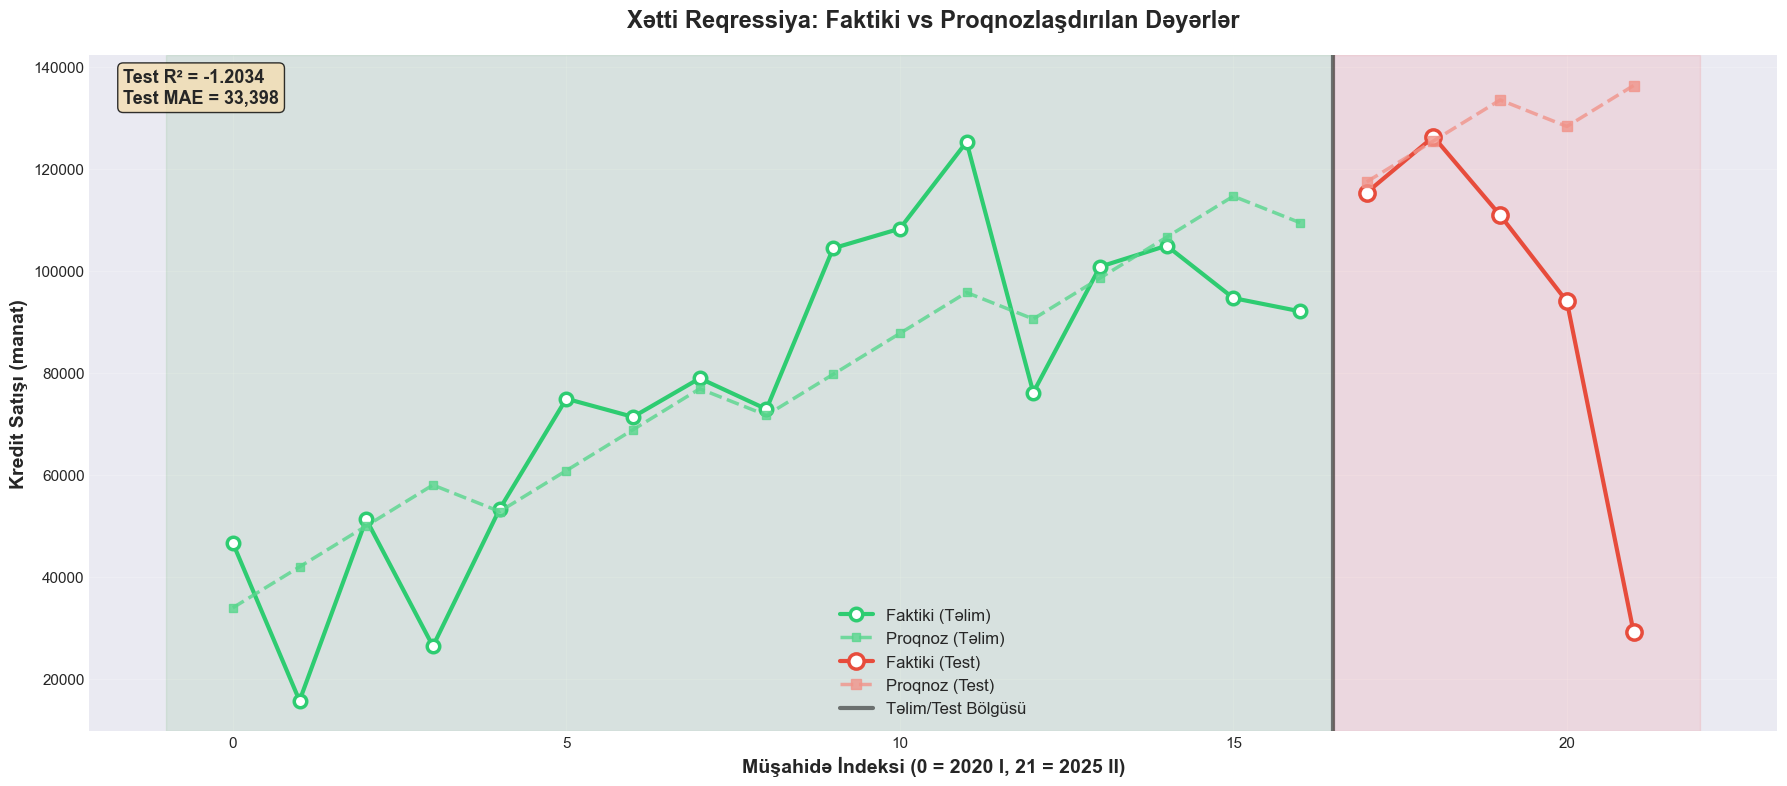


📊 VİZUAL NƏTİCƏLƏR

1️⃣  TƏLIM BÖLGƏsİ (Yaşıl):
    Proqnozlar (nöqtəli xətt) faktiki dəyərlərə (dolu xətt) yaxındır.
    Uyğunlaşma keyfiyyəti: R² = 0.6623

2️⃣  TEST BÖLGƏsİ (Qırmızı):
    Model bu məlumatları heç vaxt görməyib!
    Proqnoz dəqiqliyi: R² = -1.2034
    ⚠️  Proqnozlar və faktiki dəyərlər arasında əhəmiyyətli fərq var.


In [10]:
# Böyük, ətraflı qrafik
fig, ax = plt.subplots(figsize=(18, 8))

# Təlim məlumatları
train_indices = range(len(y_train))
ax.plot(train_indices, y_train.values, 
        marker='o', linewidth=3, markersize=9, color='#2ECC71',
        label='Faktiki (Təlim)', markerfacecolor='white', 
        markeredgewidth=2.5, markeredgecolor='#2ECC71')

ax.plot(train_indices, y_train_pred, 
        linestyle='--', linewidth=2.5, color='#58D68D', alpha=0.8,
        label='Proqnoz (Təlim)', marker='s', markersize=6)

# Test məlumatları
test_start = len(y_train)
test_indices = range(test_start, test_start + len(y_test))
ax.plot(test_indices, y_test.values,
        marker='o', linewidth=3, markersize=11, color='#E74C3C',
        label='Faktiki (Test)', markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#E74C3C')

ax.plot(test_indices, y_test_pred,
        linestyle='--', linewidth=2.5, color='#F1948A', alpha=0.8,
        label='Proqnoz (Test)', marker='s', markersize=7)

# Bölgü xətti
ax.axvline(x=test_start-0.5, color='black', linestyle='-', 
          linewidth=3, alpha=0.5, label='Təlim/Test Bölgüsü')

# Bölgələri vurğula
ax.axvspan(-1, test_start-0.5, alpha=0.08, color='green')
ax.axvspan(test_start-0.5, len(y), alpha=0.08, color='red')

# Test R² əlavə et
ax.text(0.02, 0.98, f'Test R² = {test_r2:.4f}\nTest MAE = {test_mae:,.0f}', 
       transform=ax.transAxes, fontsize=13, fontweight='bold',
       verticalalignment='top', bbox=dict(boxstyle='round', 
       facecolor='wheat', alpha=0.8))

ax.set_xlabel('Müşahidə İndeksi (0 = 2020 I, 21 = 2025 II)', fontsize=14, fontweight='bold')
ax.set_ylabel('Kredit Satışı (manat)', fontsize=14, fontweight='bold')
ax.set_title('Xətti Reqressiya: Faktiki vs Proqnozlaşdırılan Dəyərlər', 
            fontsize=17, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=12, framealpha=0.95, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n📊 VİZUAL NƏTİCƏLƏR")
print("=" * 80)
print("\n1️⃣  TƏLIM BÖLGƏsİ (Yaşıl):")
print("    Proqnozlar (nöqtəli xətt) faktiki dəyərlərə (dolu xətt) yaxındır.")
print(f"    Uyğunlaşma keyfiyyəti: R² = {train_r2:.4f}")
print()
print("2️⃣  TEST BÖLGƏsİ (Qırmızı):")
print("    Model bu məlumatları heç vaxt görməyib!")
print(f"    Proqnoz dəqiqliyi: R² = {test_r2:.4f}")
if test_r2 > 0.5:
    print("    ✅ Proqnozlar faktiki dəyərlərə kifayət qədər yaxındır.")
else:
    print("    ⚠️  Proqnozlar və faktiki dəyərlər arasında əhəmiyyətli fərq var.")

## Addım 11: Qalıqların Təhlili (Residual Analysis)

### Qalıq nədir?

**Qalıq** = Faktiki dəyər - Proqnoz

Yəni modelin **izah edə bilmədiyi** hissədir.

### Yaxşı modelin qalıqları:

1. **Ortalama 0-a yaxın** - Model sistemli xəta etmir
2. **Təsadüfi paylanmış** - Heç bir açıq nümunə yoxdur
3. **Sabit variasiya** - Zamanla böyüyüb-kiçilmir (homoskedasticity)
4. **Normal paylanmış** - Zəng əyrisi forması

Bu şərtlər pozularsa, model təkmilləşdirilməlidir.

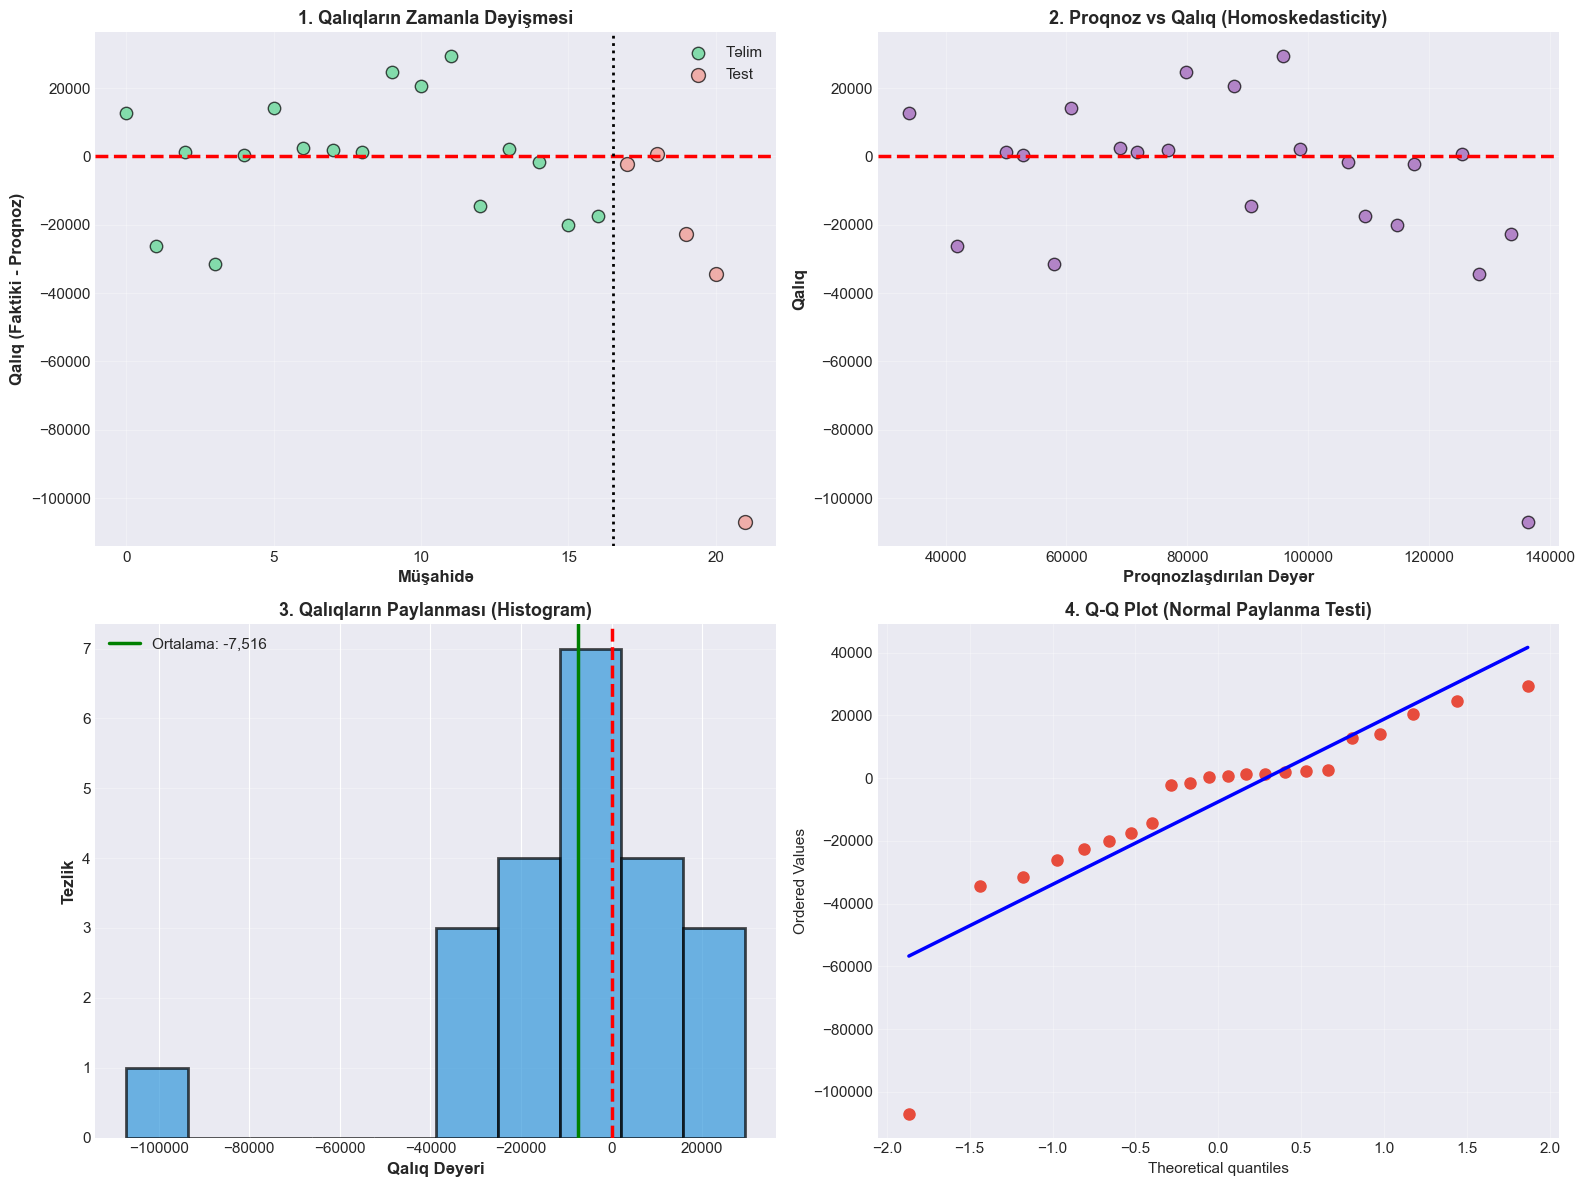


📊 QALIQ TƏHLİLİ - HƏR QRAFİKİN MƏNAŞI

1️⃣  ZAMANLA DƏYİŞMƏ (Yuxarı-sol):
    • Qalıqların ortalama: -7,516.26 (0-a yaxın olmalı ✓)
    • İdeal: Nöqtələr 0 xətti ətrafında təsadüfi paylanmalıdır
    • Nümunə varsa (məs. artma trendi), model bəzi strukturları qaçırır

2️⃣  PROQNOZ VS QALIQ (Yuxarı-sağ):
    • İdeal: Nöqtələr 0 ətrafında horizontal zolaq əmələ gətirməlidir
    • Əgər huniyə forması varsa (variasiya dəyişir), heteroskedasticity var

3️⃣  HİSTOQRAM (Aşağı-sol):
    • İdeal: Zəng əyrisi, 0 ətrafında simmetrik
    • Ortalama -7,516, 0-a yaxındır ✓

4️⃣  Q-Q PLOT (Aşağı-sağ):
    • İdeal: Nöqtələr mavi xətt üzərində yerləşməlidir
    • Sapma = qalıqlar normal paylanmır

📊 SHAPIRO-WILK NORMAL PAYLANMA TESTİ:
    p-value: 0.0008
    ⚠️  Qalıqlar normal paylanmayıb (p < 0.05)


In [11]:
# Qalıqları hesabla
train_residuals = y_train - y_train_pred
test_residuals = y_test.values - y_test_pred

# 4 alt qrafik
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Qalıqların zamanla dəyişməsi
axes[0, 0].scatter(range(len(train_residuals)), train_residuals, 
                   color='#58D68D', s=80, alpha=0.7, edgecolors='black', label='Təlim')
axes[0, 0].scatter(range(len(train_residuals), len(train_residuals) + len(test_residuals)), 
                   test_residuals, color='#F1948A', s=100, alpha=0.7, 
                   edgecolors='black', label='Test')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2.5)
axes[0, 0].axvline(x=len(train_residuals)-0.5, color='black', linestyle=':', linewidth=2)
axes[0, 0].set_xlabel('Müşahidə', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Qalıq (Faktiki - Proqnoz)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('1. Qalıqların Zamanla Dəyişməsi', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Proqnoz vs Qalıq (heteroskedastisity yoxlanışı)
all_predictions = np.concatenate([y_train_pred, y_test_pred])
all_residuals = np.concatenate([train_residuals, test_residuals])
axes[0, 1].scatter(all_predictions, all_residuals, 
                   color='#9B59B6', s=80, alpha=0.7, edgecolors='black')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2.5)
axes[0, 1].set_xlabel('Proqnozlaşdırılan Dəyər', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Qalıq', fontsize=12, fontweight='bold')
axes[0, 1].set_title('2. Proqnoz vs Qalıq (Homoskedasticity)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Qalıqların histogramı (normal paylanma)
axes[1, 0].hist(all_residuals, bins=10, color='#3498DB', 
               alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2.5)
axes[1, 0].axvline(x=all_residuals.mean(), color='green', linestyle='-', 
                  linewidth=2.5, label=f'Ortalama: {all_residuals.mean():,.0f}')
axes[1, 0].set_xlabel('Qalıq Dəyəri', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Tezlik', fontsize=12, fontweight='bold')
axes[1, 0].set_title('3. Qalıqların Paylanması (Histogram)', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot (Normal paylanma yoxlanışı)
stats.probplot(all_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].get_lines()[0].set_color('#E74C3C')
axes[1, 1].get_lines()[0].set_markersize(8)
axes[1, 1].get_lines()[1].set_color('blue')
axes[1, 1].get_lines()[1].set_linewidth(2.5)
axes[1, 1].set_title('4. Q-Q Plot (Normal Paylanma Testi)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 QALIQ TƏHLİLİ - HƏR QRAFİKİN MƏNAŞI")
print("=" * 80)
print("\n1️⃣  ZAMANLA DƏYİŞMƏ (Yuxarı-sol):")
print(f"    • Qalıqların ortalama: {all_residuals.mean():,.2f} (0-a yaxın olmalı ✓)")
print("    • İdeal: Nöqtələr 0 xətti ətrafında təsadüfi paylanmalıdır")
print("    • Nümunə varsa (məs. artma trendi), model bəzi strukturları qaçırır")

print("\n2️⃣  PROQNOZ VS QALIQ (Yuxarı-sağ):")
print("    • İdeal: Nöqtələr 0 ətrafında horizontal zolaq əmələ gətirməlidir")
print("    • Əgər huniyə forması varsa (variasiya dəyişir), heteroskedasticity var")

print("\n3️⃣  HİSTOQRAM (Aşağı-sol):")
print("    • İdeal: Zəng əyrisi, 0 ətrafında simmetrik")
print(f"    • Ortalama {all_residuals.mean():,.0f}, 0-a yaxındır ✓")

print("\n4️⃣  Q-Q PLOT (Aşağı-sağ):")
print("    • İdeal: Nöqtələr mavi xətt üzərində yerləşməlidir")
print("    • Sapma = qalıqlar normal paylanmır")

# Statistik test
from scipy.stats import shapiro
stat, p_value = shapiro(all_residuals)
print(f"\n📊 SHAPIRO-WILK NORMAL PAYLANMA TESTİ:")
print(f"    p-value: {p_value:.4f}")
if p_value > 0.05:
    print("    ✅ Qalıqlar normal paylanıb (p > 0.05)")
else:
    print("    ⚠️  Qalıqlar normal paylanmayıb (p < 0.05)")

## Addım 12: Əmsalların Təhlili və Vizualizasiyası

### Əmsallar nəyi göstərir?

Hər əmsal həmin xüsusiyyətin kredit satışına **təsir gücünü** göstərir:

- **Müsbət əmsal**: Xüsusiyyət artdıqda, kredit satışı da artır
- **Mənfi əmsal**: Xüsusiyyət artdıqda, kredit satışı azalır
- **Böyük əmsal**: Güclü təsir
- **Kiçik əmsal**: Zəif təsir

Bu, xətti reqressiyanın ən böyük **üstünlüyüdür** - hər şey aydın və izah oluna bilən!

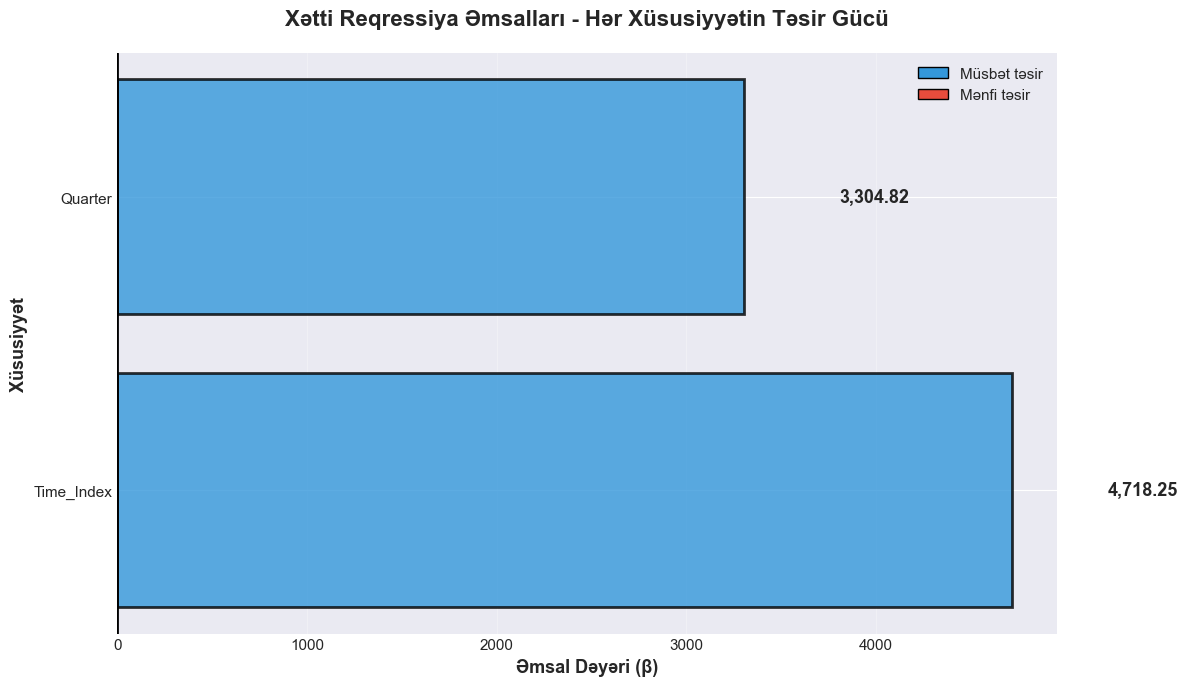


📊 ƏMSALLARIN İZAHI

🔹 Kəsişmə nöqtəsi (Intercept): 30,625.83
   Bütün xüsusiyyətlər 0 olduqda başlanğıc dəyəri

🔹 Xüsusiyyətlərin təsiri:

   Time_Index:
   Əmsal: 4,718.25
   💡 Time_Index 1 vahid artdıqda, kredit satışı 4,718 manat ARTAR
   📈 İllik təsir: təqribən 18,873 manat

   Quarter:
   Əmsal: 3,304.82
   💡 Quarter 1 vahid artdıqda, kredit satışı 3,305 manat ARTAR



In [12]:
# Əmsalları vizuallaşdıraq
fig, ax = plt.subplots(figsize=(12, 7))

# Bar chart
colors = ['#3498DB' if c > 0 else '#E74C3C' for c in coefficients]
bars = ax.barh(feature_cols, coefficients, color=colors, 
              edgecolor='black', linewidth=2, alpha=0.8)

# 0 xətti
ax.axvline(x=0, color='black', linestyle='-', linewidth=2)

# Dəyərləri göstər
for i, (bar, coef) in enumerate(zip(bars, coefficients)):
    width = bar.get_width()
    label_x = width + (500 if width > 0 else -500)
    ax.text(label_x, bar.get_y() + bar.get_height()/2, 
           f'{coef:,.2f}', ha='left' if width > 0 else 'right', 
           va='center', fontsize=13, fontweight='bold')

ax.set_xlabel('Əmsal Dəyəri (β)', fontsize=13, fontweight='bold')
ax.set_ylabel('Xüsusiyyət', fontsize=13, fontweight='bold')
ax.set_title('Xətti Reqressiya Əmsalları - Hər Xüsusiyyətin Təsir Gücü', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Rəng açıqlaması
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498DB', edgecolor='black', label='Müsbət təsir'),
                  Patch(facecolor='#E74C3C', edgecolor='black', label='Mənfi təsir')]
ax.legend(handles=legend_elements, loc='best', fontsize=11)

plt.tight_layout()
plt.show()

print("\n📊 ƏMSALLARIN İZAHI")
print("=" * 80)
print(f"\n🔹 Kəsişmə nöqtəsi (Intercept): {intercept:,.2f}")
print("   Bütün xüsusiyyətlər 0 olduqda başlanğıc dəyəri")

print(f"\n🔹 Xüsusiyyətlərin təsiri:")
for feature, coef in zip(feature_cols, coefficients):
    print(f"\n   {feature}:")
    print(f"   Əmsal: {coef:,.2f}")
    if coef > 0:
        print(f"   💡 {feature} 1 vahid artdıqda, kredit satışı {abs(coef):,.0f} manat ARTAR")
    else:
        print(f"   💡 {feature} 1 vahid artdıqda, kredit satışı {abs(coef):,.0f} manat AZALAR")
    
    if 'Time_Index' in feature:
        monthly_effect = coef * 4  # İllik təsir
        print(f"   📈 İllik təsir: təqribən {monthly_effect:,.0f} manat")

print("\n" + "=" * 80)

## Yekun Nəticələr və Tövsiyələr

### 🎯 Bu analizdə nə etdik?

Addım-addım xətti reqressiya ilə kredit satışı proqnozlaşdırması apardıq:

1. **Məlumatları başa düşdük** - Vizual təhlil və statistika
2. **Əlaqələri öyrəndik** - Korrelyasiya və səpələnmə diaqramları
3. **Model qurduq** - Xətti reqressiya
4. **Qiymətləndirdik** - R², MAE, RMSE metrikləri
5. **Təhlil etdik** - Qalıqlar və əmsallar
6. **İzah etdik** - Hər xüsusiyyətin təsiri

In [13]:
print("=" * 90)
print("YEKİN HESABAT: XƏTTİ REQRESSİYA İLƏ KREDİT SATIŞI PROQNOZLAŞDİRİLMASI")
print("=" * 90)

print("\n📊 MƏLUMAT HAQQINDA")
print("-" * 90)
print(f"Dövr:                 {df_work['Rüblər'].iloc[0]} → {df_work['Rüblər'].iloc[-1]}")
print(f"Ümumi müşahidə:       {len(df_work)} rüb")
print(f"Təlim məlumatları:    {len(y_train)} rüb ({len(y_train)/len(df_work)*100:.0f}%)")
print(f"Test məlumatları:     {len(y_test)} rüb ({len(y_test)/len(df_work)*100:.0f}%)")
print(f"İstifadə olunan xüsusiyyətlər: {', '.join(feature_cols)}")

print("\n🔧 MODEL PARAMETRLƏRI")
print("-" * 90)
print(f"Model tipi:           Xətti Reqressiya (Linear Regression)")
print(f"Kəsişmə (Intercept):  {intercept:,.2f}")
print(f"Əmsallar:")
for feature, coef in zip(feature_cols, coefficients):
    print(f"  • {feature:<15} : {coef:>12,.2f}")

print("\n📈 PERFORMANS NƏTİCƏLƏRİ")
print("-" * 90)
print(f"{'Metrika':<20} {'Təlim':>15} {'Test':>15} {'Qeyd':<30}")
print("-" * 90)
print(f"{'R² Score':<20} {train_r2:>15.4f} {test_r2:>15.4f} {'1-ə yaxın = yaxşı':<30}")
print(f"{'MAE (manat)':<20} {train_mae:>15,.2f} {test_mae:>15,.2f} {'Aşağı = yaxşı':<30}")
print(f"{'RMSE (manat)':<20} {train_rmse:>15,.2f} {test_rmse:>15,.2f} {'Aşağı = yaxşı':<30}")

print("\n💡 ƏSAS NƏTİCƏLƏR")
print("-" * 90)
print(f"\n1. Model test məlumatlarında R² = {test_r2:.4f} əldə etdi.")
if test_r2 > 0.7:
    print("   ✅ Bu çox yaxşı nəticədir! Model məlumatları yaxşı izah edir.")
elif test_r2 > 0.5:
    print("   ✅ Bu qənaətbəxş nəticədir. Model əsas nümunələri tutur.")
elif test_r2 > 0.3:
    print("   ⚠️  Orta nəticə. Model bəzi nümunələri tutur, amma təkmilləşməyə ehtiyac var.")
else:
    print("   ❌ Zəif nəticə. Xətti reqressiya bu məlumatlar üçün uyğun olmaya bilər.")

print(f"\n2. Orta mütləq xəta (MAE) {test_mae:,.0f} manatdır.")
mae_percent = (test_mae / y_test.mean()) * 100
print(f"   Bu, ortalama kredit satışının {mae_percent:.1f}%-ni təşkil edir.")

print(f"\n3. Ən təsirli xüsusiyyət: {feature_cols[np.argmax(np.abs(coefficients))]}")
max_coef = coefficients[np.argmax(np.abs(coefficients))]
print(f"   Əmsal: {max_coef:,.2f}")

overfitting_diff = train_r2 - test_r2
print(f"\n4. Overfitting yoxlanışı:")
print(f"   Təlim R² - Test R² = {overfitting_diff:.4f}")
if overfitting_diff < 0.1:
    print("   ✅ Overfitting yoxdur, model ümumiləşdirə bilir.")
else:
    print("   ⚠️  Overfitting ola bilər, daha sadə model lazımdır.")

print("\n📌 TÖVSİYƏLƏR")
print("-" * 90)
print("\n✓ GÜCLÜ TƏRƏFLƏR:")
print("  • Sadə və başa düşüləndir")
print("  • Sürətli hesablanır")
print("  • Hər xüsusiyyətin təsiri aydın görünür")
print("  • İzah etmək asandır (business üçün əla)")

print("\n⚠️  LİMİTLƏR:")
print("  • Yalnız xətti əlaqələri tutur (qeyri-xətti nümunələri qaçırır)")
print("  • Mövsümi nümunələri tam tutmur")
print("  • Az sayda xüsusiyyət istifadə olunub")
print("  • Qısa məlumat tarixi (22 müşahidə)")

print("\n🔮 GƏLƏCƏK ADDIMLAR:")
print("  1. Daha çox xüsusiyyət əlavə edin (ÜDM, faiz dərəcələri, və s.)")
print("  2. Polinom reqressiya sınayın (qeyri-xətti əlaqələr üçün)")
print("  3. Ridge və ya Lasso reqressiya istifadə edin (regularizasiya)")
print("  4. Digər metodlarla müqayisə edin (Random Forest, SARIMAX)")
print("  5. Cross-validation tətbiq edin (daha etibarlı qiymətləndirmə)")

print("\n" + "=" * 90)
print("✅ ANALİZ BAŞA ÇATDI - UĞURLAR!")
print("=" * 90)

YEKİN HESABAT: XƏTTİ REQRESSİYA İLƏ KREDİT SATIŞI PROQNOZLAŞDİRİLMASI

📊 MƏLUMAT HAQQINDA
------------------------------------------------------------------------------------------
Dövr:                 2020 I → 2025 II
Ümumi müşahidə:       22 rüb
Təlim məlumatları:    17 rüb (77%)
Test məlumatları:     5 rüb (23%)
İstifadə olunan xüsusiyyətlər: Time_Index, Quarter

🔧 MODEL PARAMETRLƏRI
------------------------------------------------------------------------------------------
Model tipi:           Xətti Reqressiya (Linear Regression)
Kəsişmə (Intercept):  30,625.83
Əmsallar:
  • Time_Index      :     4,718.25
  • Quarter         :     3,304.82

📈 PERFORMANS NƏTİCƏLƏRİ
------------------------------------------------------------------------------------------
Metrika                        Təlim            Test Qeyd                          
------------------------------------------------------------------------------------------
R² Score                      0.6623         -1.2034 1-ə